# Exploratory data analysis  
**Created by mrpintime**

# Data Set Information:  

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).  

# Attribute Information:  

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:  
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
2 sex - student's sex (binary: 'F' - female or 'M' - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)  
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  

# these grades are related with the course subject, Math or Portuguese:  
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)


## columns for study:  
1-paid (paid extra money for extra classess within course)    
2-higher (wants to achived higher education)  
3-internet  
4-study time  
5-absence  
6-school  
9-failures  
8-Dalc  
10-Fedu  
11-Medu  
12-goout

In [1]:
#import libraries

In [1]:
## import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#for use ANOVA
from scipy import stats
# for winsorizing our outliers
# from scipy.stats.mstats import winsorize

In [2]:
# import dataset

In [3]:
# import dataset
df_data = pd.read_csv('wrangled.csv')

In [4]:
df = df_data.copy()

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## prepare dataset for EDA

In [6]:
# deleting G1 and G2
df = df.drop(columns=['G1','G2'])

In [7]:
df.duplicated().value_counts()

False    1038
True        6
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.index.is_unique

True

In [10]:
num_columns = df.select_dtypes(exclude='object').columns.to_list()
num_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G3']

In [11]:
obj_columns = df.select_dtypes(include='object').columns.to_list()
obj_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## analysis

In [12]:
new_obj = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
 'internet',
 'romantic']

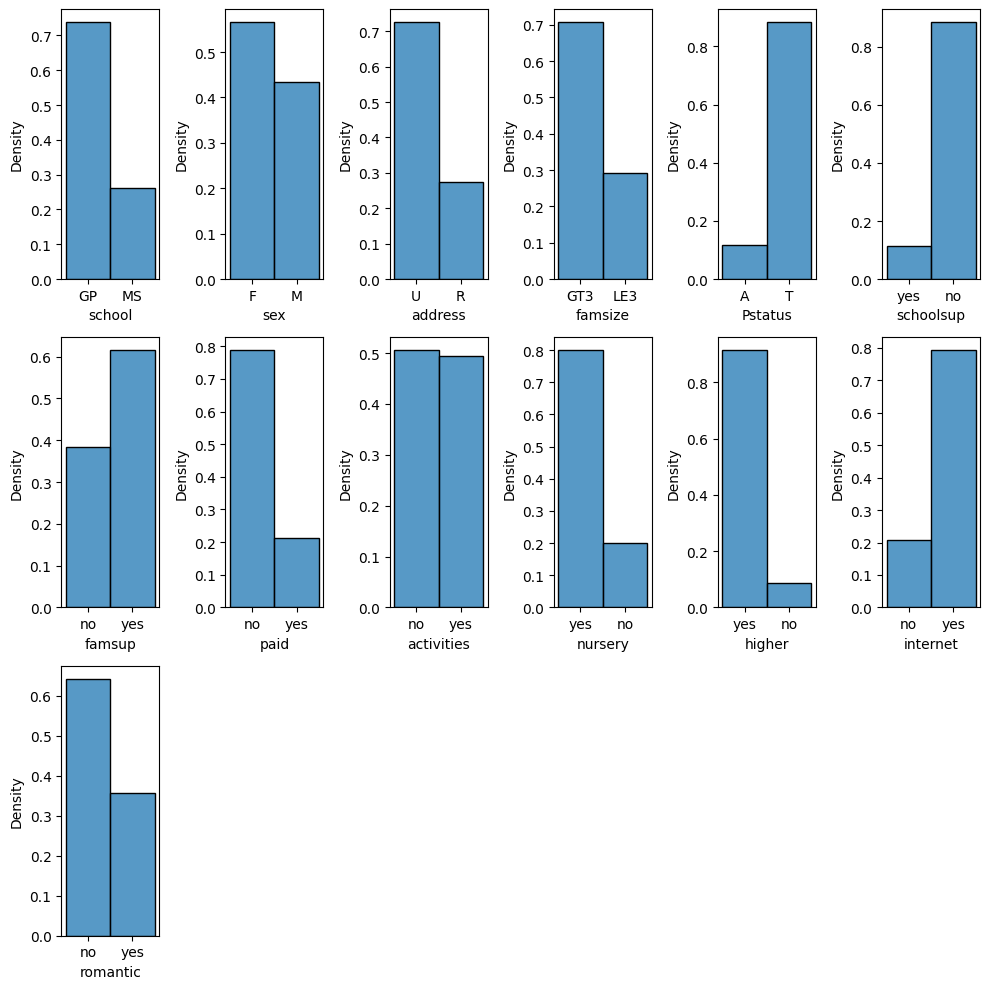

In [13]:
fig = plt.figure(figsize=(10,10))

for index,i in enumerate(new_obj):
    ax = fig.add_subplot(3,6,index+1)
    sns.histplot(df[i], stat='density', ax=ax)
plt.tight_layout()

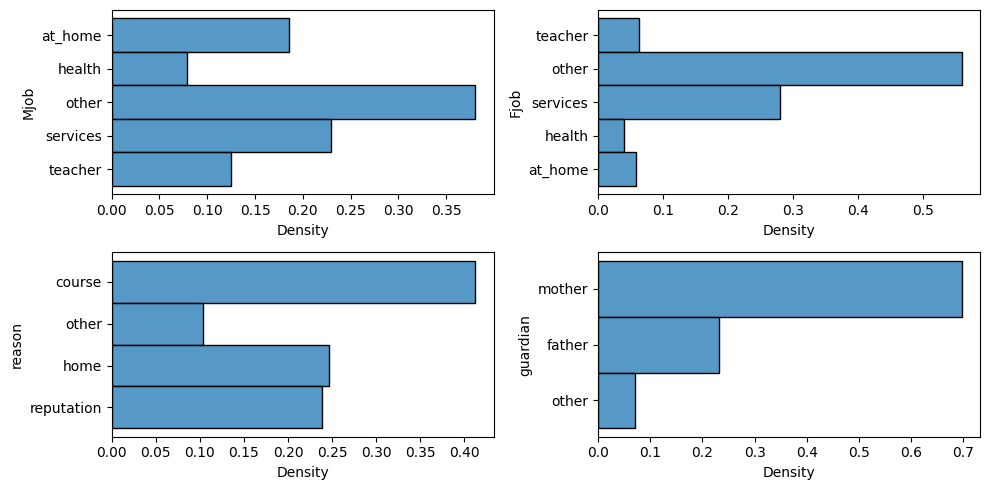

In [14]:
fig = plt.figure(figsize=(10,5))
for index,i in enumerate(['Mjob', 'Fjob', 'reason', 'guardian']):
    ax = fig.add_subplot(2,2,index+1)
    sns.histplot(y=df[i], stat='density', ax=ax)
plt.tight_layout()

In [15]:
len(num_columns)

14

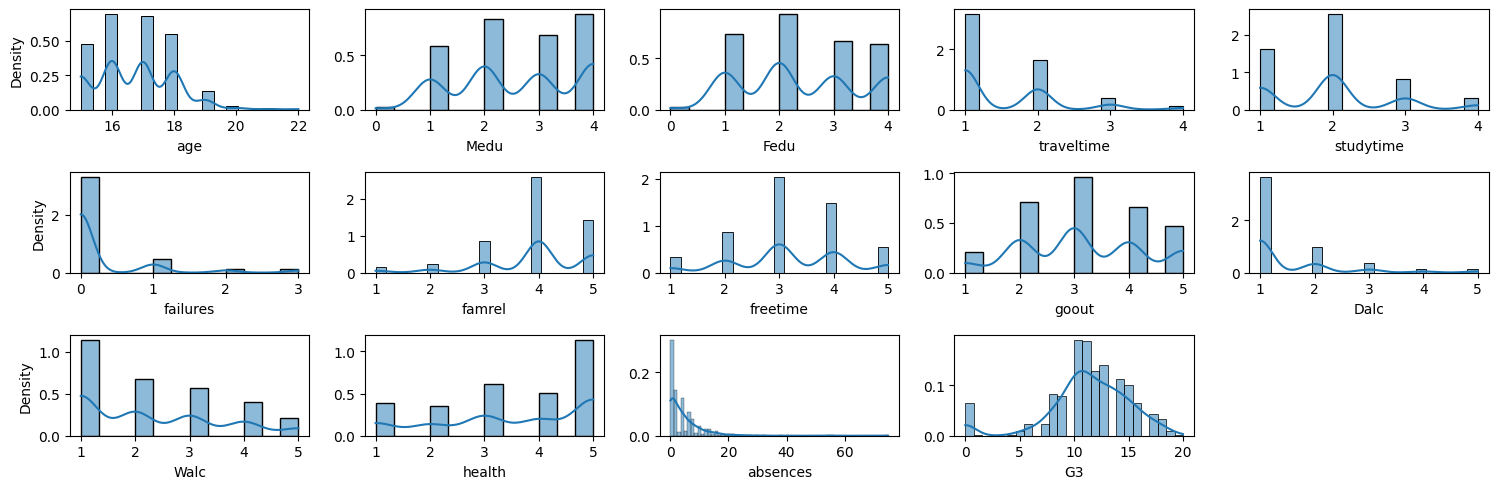

In [16]:
fig = plt.figure(figsize=(15,5))
for index,i in enumerate(num_columns):
    ax = fig.add_subplot(3,5,index+1)
    axw = sns.histplot(x=df[i], stat='density', kde=True, ax=ax)
    if index+1 in [1,6,11]:
        axw.set_ylabel('Density')
    else:
        axw.set_ylabel('')
plt.tight_layout()

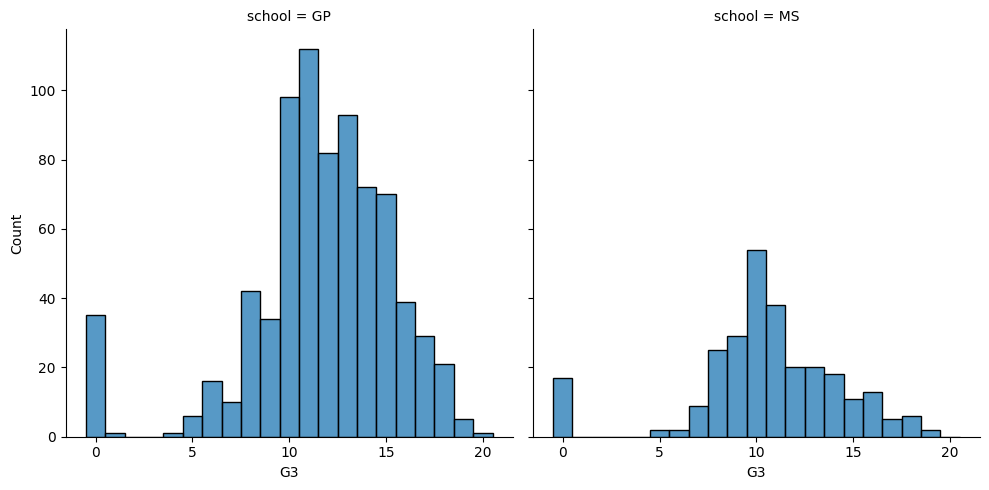

In [17]:
sns.displot(df, x='G3', col="school", discrete=True)


In [18]:
df[['G3', 'school']].groupby('school').mean()

,G3
school,
GP,11.624511
MS,10.553506


In [19]:
len(num_columns)

14

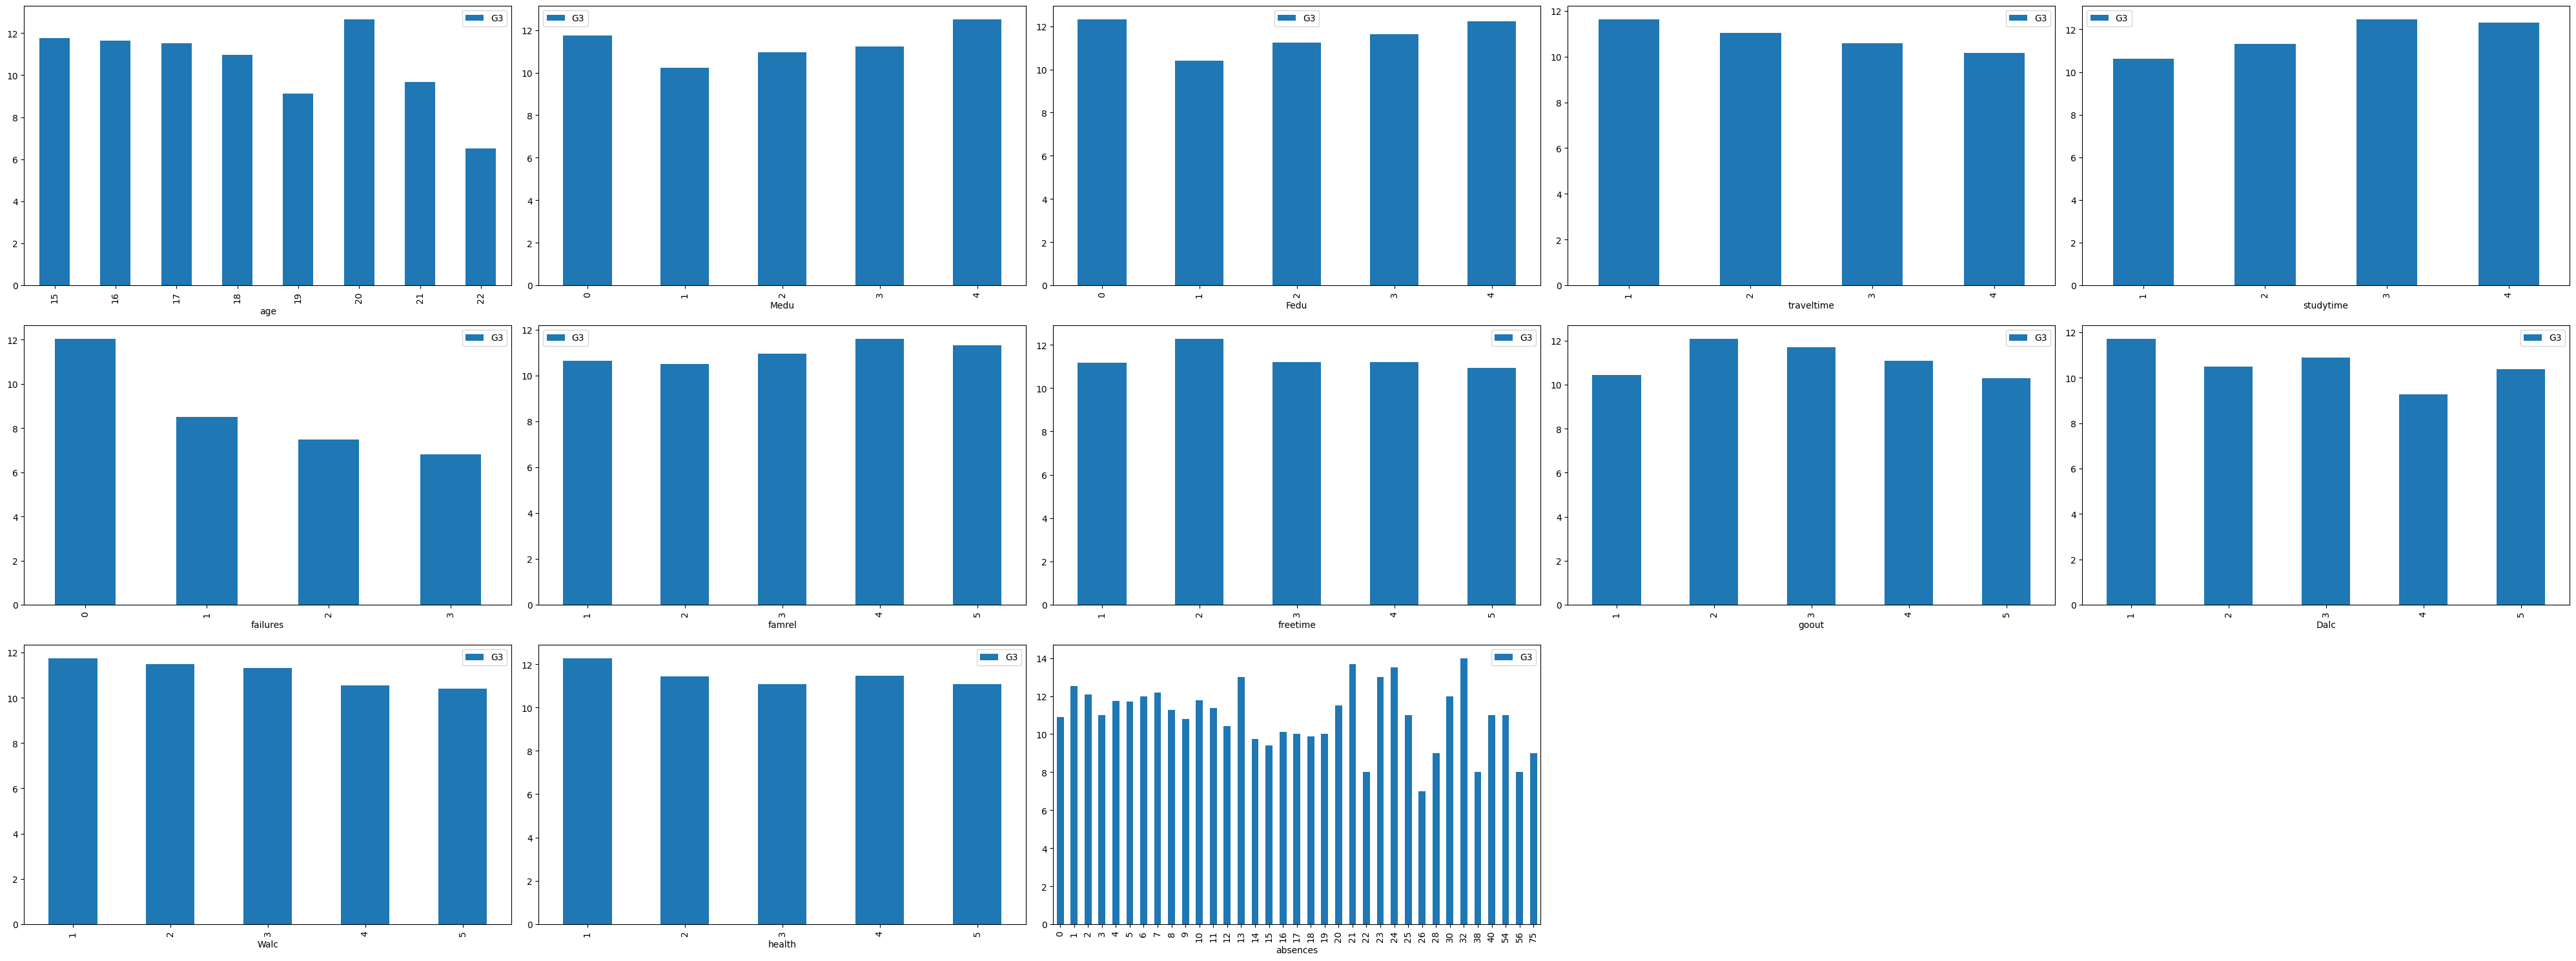

In [20]:
plt.figure(figsize=(40,15))
for index,i in enumerate(num_columns):
    if i == 'G3':
        continue
    df[['G3', i]].groupby(i).mean().plot.bar(ax=plt.subplot(3,5,index+1))
    
plt.tight_layout()

In [21]:
len(obj_columns)

17

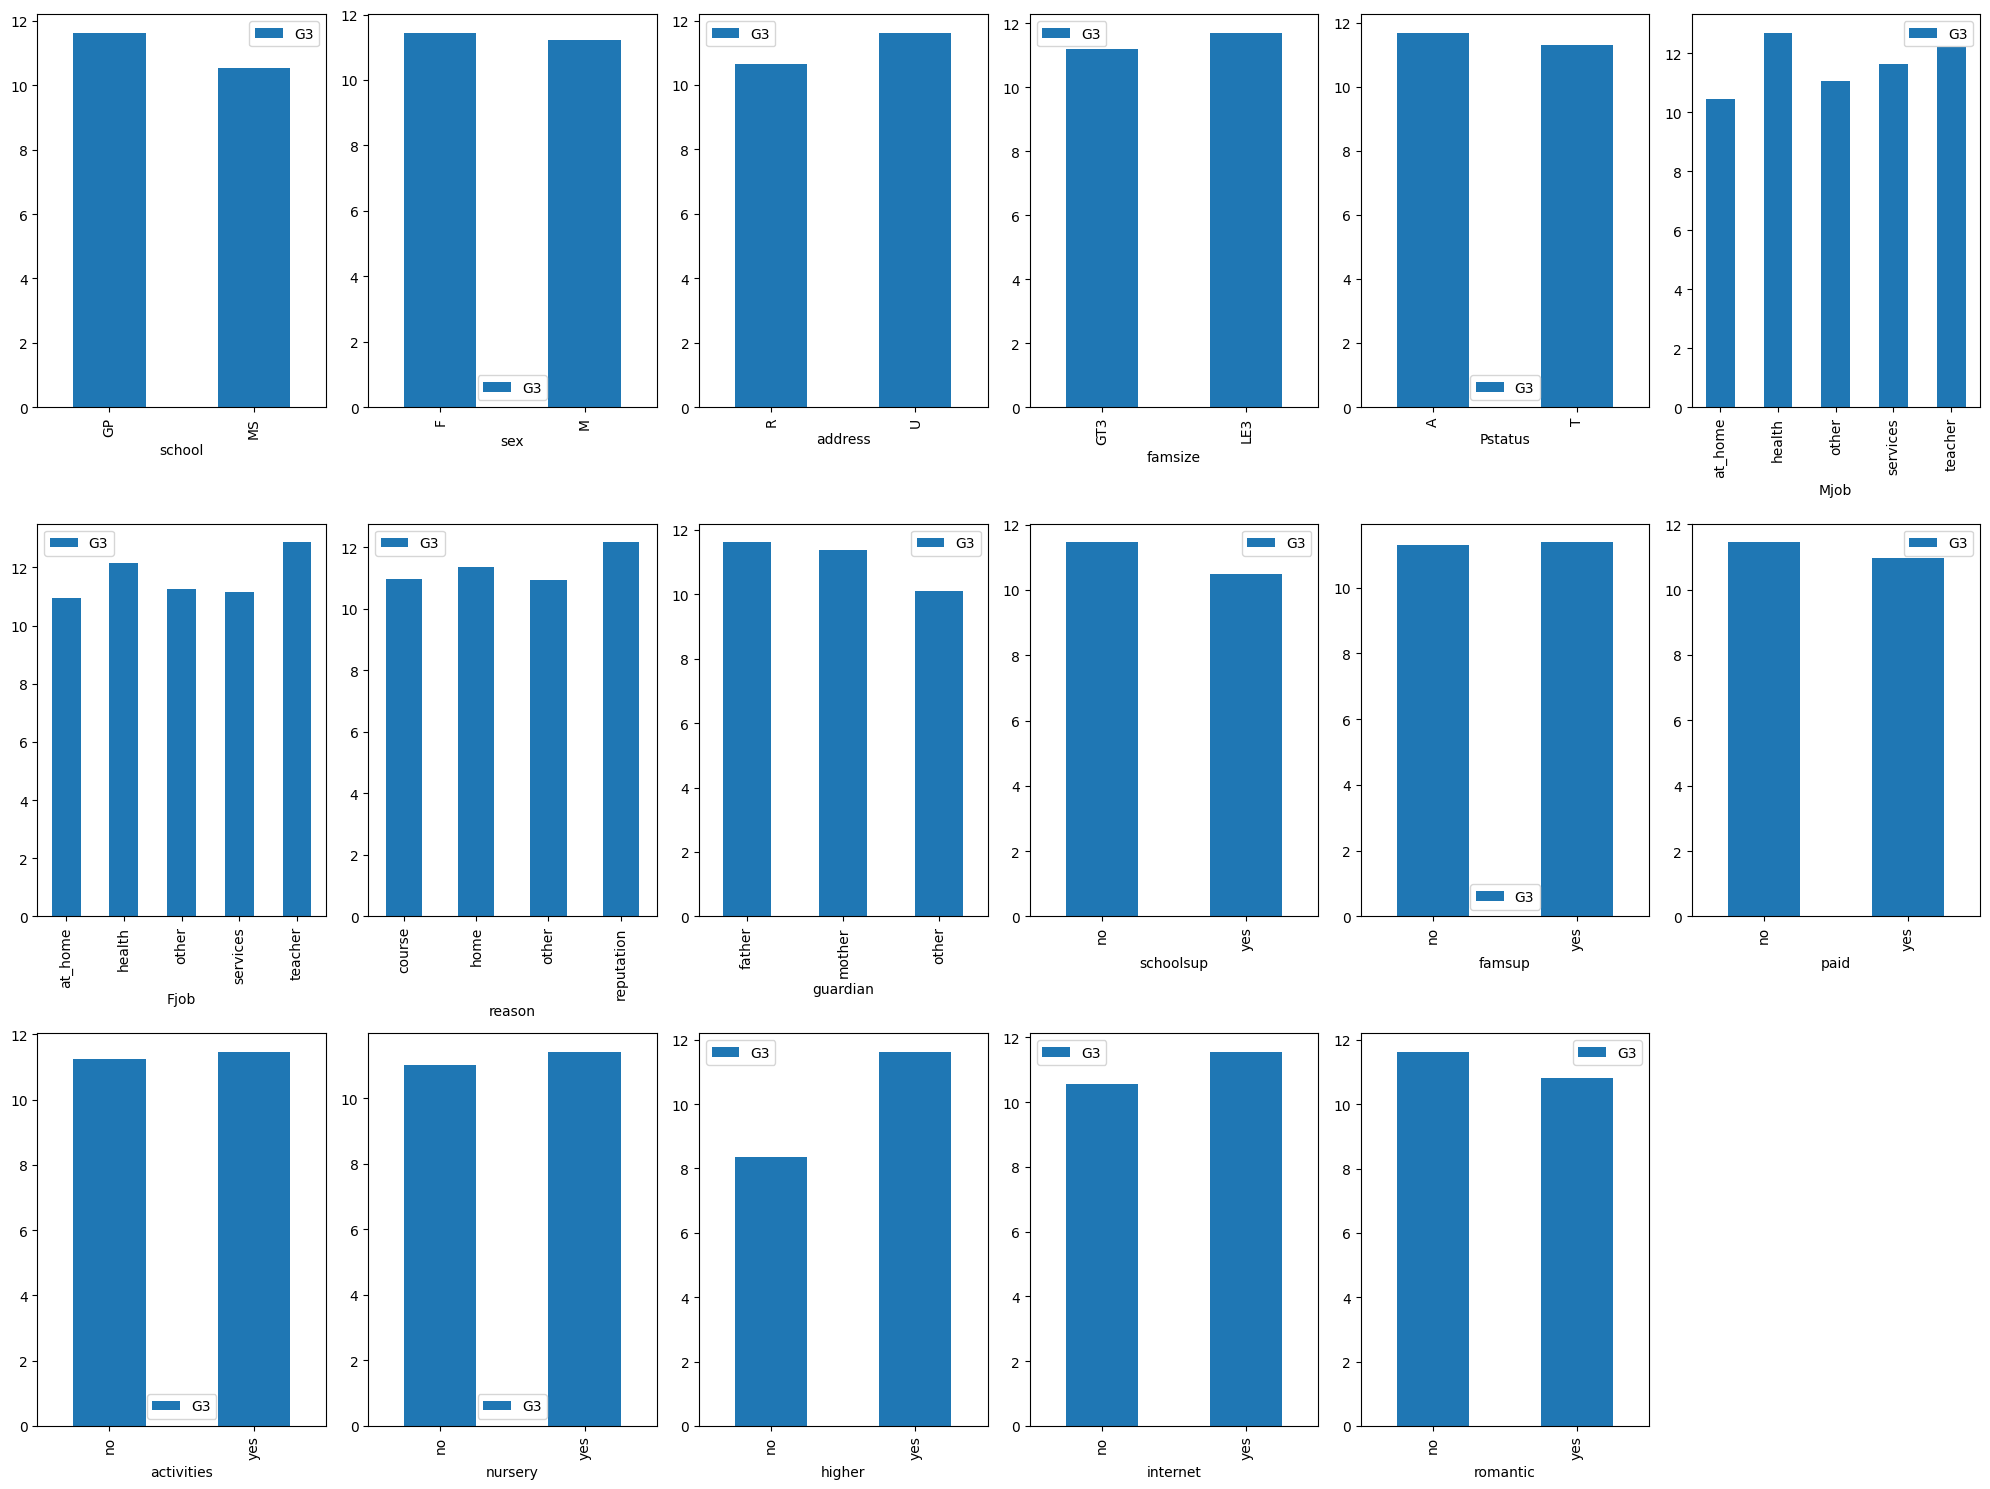

In [22]:
plt.figure(figsize=(20,15))
for index,i in enumerate(obj_columns):
    df[['G3', i]].groupby(i).mean().plot.bar(ax=plt.subplot(3,6,index+1))
    
plt.tight_layout()

## Outliers

In [23]:
#combining g1 and g2 to df
df = df_data.copy()

In [24]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
1043,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


<Axes: title={'center': 'G3'}, xlabel='[school]'>

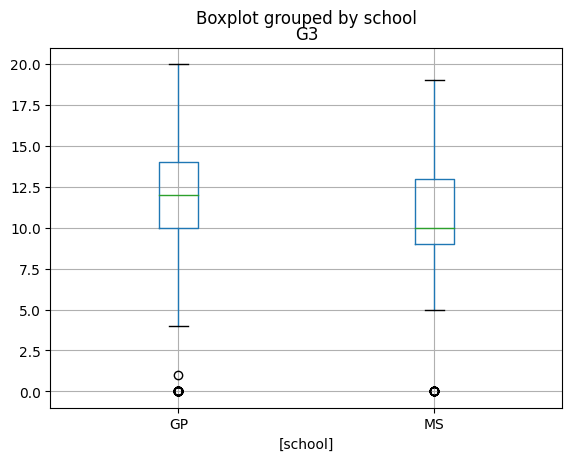

In [25]:
df[['G3', 'school']].boxplot(by='school')

In [26]:
#percentage of 0 marks in MS students
df[df['school']=='MS']['G3'].value_counts().loc[0]/df[df['school']=='MS']['G3'].count()*100

6.61764705882353

***Outliers in GP school***

In [27]:
percent_gp = df[df['school']=='GP']['G3'].value_counts()/df[df['school']=='GP']['G3'].count() *100

In [28]:
percent_gp

11    14.637306
10    12.823834
13    12.046632
12    10.751295
14     9.326425
15     9.196891
8      5.440415
16     5.051813
0      4.533679
9      4.404145
17     3.886010
18     2.720207
6      2.072539
7      1.295337
5      0.777202
19     0.647668
1      0.129534
20     0.129534
4      0.129534
Name: G3, dtype: float64

In [29]:
iqr = np.percentile(df[df['school']=='GP']['G3'], 75) - np.percentile(df[df['school']=='GP']['G3'], 25)

In [30]:
# outliers instances by boxplot in GP
lower = np.percentile(df[df['school']=='GP']['G3'], 25) - 1.5*iqr
percent_gp[percent_gp.index<lower]

0    4.533679
1    0.129534
Name: G3, dtype: float64

In [31]:
# sumation of percentage of these outliers identified with box plot
c = df[df['school']=='GP']['G3'].value_counts()/df[df['school']=='GP']['G3'].count() *100
c[[0,1]].sum()

4.663212435233161

In [32]:
# defining outliers with Zscore in MS school
ma = stats.zscore(df[df['school']=='MS']['G3']).max()
mi = stats.zscore(df[df['school']=='MS']['G3']).min()
print(f'min {mi}, max {ma}')

min -2.6951596490815053, max 2.174974989538501


In [33]:
# defining outliers with Zscore in MS school
ma = stats.zscore(df[df['school']=='GP']['G3']).max()
mi = stats.zscore(df[df['school']=='GP']['G3']).min()
print(f'min {mi}, max {ma}')

min -3.05600614871305, max 2.197833617029016


In [34]:
zs = stats.zscore(df[df['school']=='GP']['G3'])
zs[zs<=-3].value_counts()

-3.056006    35
Name: G3, dtype: int64

In [35]:
first = df['G3'].iloc[163]
print(f'outlier instance by zscore: {first}')

outlier instance by zscore: 0


<Axes: >

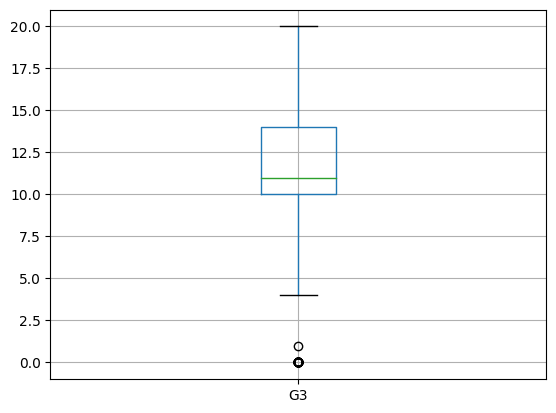

In [36]:
# defining outliers G3 with box plot in all students
df[['G3']].boxplot()

In [37]:
# so we have 0 and 1 as instances of outliers by boxplot in all records of dataset

In [38]:
# with zscore
zs = stats.zscore(df['G3'])
indexes = zs[zs<-3].index

In [39]:
df['G3']

0       11
1       11
2       12
3       14
4       13
        ..
1039     9
1040    16
1041     7
1042    10
1043     9
Name: G3, Length: 1044, dtype: int64

In [40]:
df['G3'][indexes]

Series([], Name: G3, dtype: int64)

In [41]:
df[df['G3'] == 0].index

Int64Index([ 163,  440,  519,  563,  567,  583,  586,  597,  603,  605,  610,
             626,  637,  639,  640,  777,  779,  780,  783,  784,  785,  786,
             789,  793,  795,  797,  799,  802,  809,  811,  817,  819,  822,
             870,  888,  891,  893,  908,  913,  918,  945,  959,  965,  981,
             982,  983,  986,  990,  992, 1016, 1032, 1036, 1038],
           dtype='int64')

In [42]:
df[df['G3'] == 1].index

Int64Index([172], dtype='int64')

In [43]:
zs[[163,172]]

163   -2.936090
172   -2.677221
Name: G3, dtype: float64

In [44]:
# as we can see these are so close to -3

In [45]:
df[(df['G3'] == 1) | (df['G3'] == 0)]['G3'].value_counts()

0    53
1     1
Name: G3, dtype: int64

In [46]:
# it did not show any outliers by zscore in all student records so by the way
# 0 and 1 are so close to -3 in zscore distribution and we will remove them

**so outliers in all students mark or in groups of school that distinguished by `Z-Score` and `Box-plot` will be remove**

In [47]:
indexes = df[(df['G3'] == 1) | (df['G3'] == 0)].index

In [48]:
df_new = df.drop(index=indexes)

<Axes: >

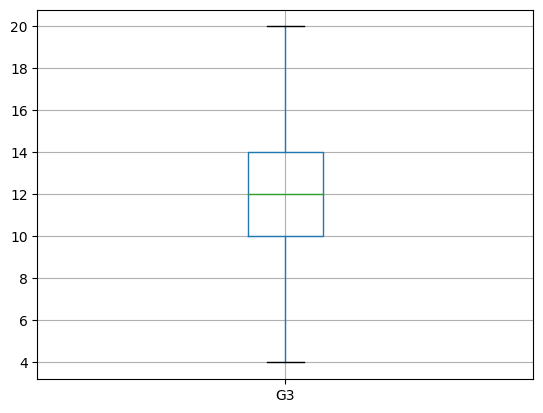

In [49]:
# check box plot again
df_new[['G3']].boxplot()

In [50]:
skewness_overall = df_new.skew(numeric_only=True).sort_values(ascending=False)
skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)]

absences      3.704740
failures      3.037928
Dalc          2.176671
traveltime    1.396295
studytime     0.660496
Walc          0.614028
famrel       -1.065977
dtype: float64

If we analyse and try to separate dataset to two sub-dataset based on schools then:  
**1- We have to have more info and feature coresponded to schools and describe schools in more details.  
2- If we divide dataset, we have more skew features and make our features to be more unstable and unreliable in divided dataset**  
**so we do not use school separating for our analysis but we may use it for our model**

# Analysis some useful features

In [51]:
df_new.select_dtypes(include='object').describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,736,561,725,693,873,376,555,405,692,873,612,779,503,793,912,788,649


In [52]:
df_new.select_dtypes(exclude='object').describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,990.000000,990.000000,990.00000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,16.696970,2.619192,2.40202,1.516162,1.977778,0.230303,3.940404,3.196970,3.153535,1.491919,2.290909,3.535354,4.676768,11.419192,11.613131,11.959596
std,1.233625,1.126676,1.10060,0.730141,0.833761,0.614528,0.924601,1.034584,1.137051,0.914679,1.286241,1.431363,6.287883,2.896781,2.832148,2.892825
min,15.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000
25%,16.000000,2.000000,2.00000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.250000,0.000000,9.000000,10.000000,10.000000
50%,17.000000,3.000000,2.00000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.500000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.00000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.00000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [53]:
#concat G3 with numeric
con_obj_7 = pd.concat([df_new.select_dtypes(exclude='object').iloc[:,0:7],df_new[['G3']]], axis=1)
con_obj_7_14 = df_new.select_dtypes(exclude='object').iloc[:,7:]

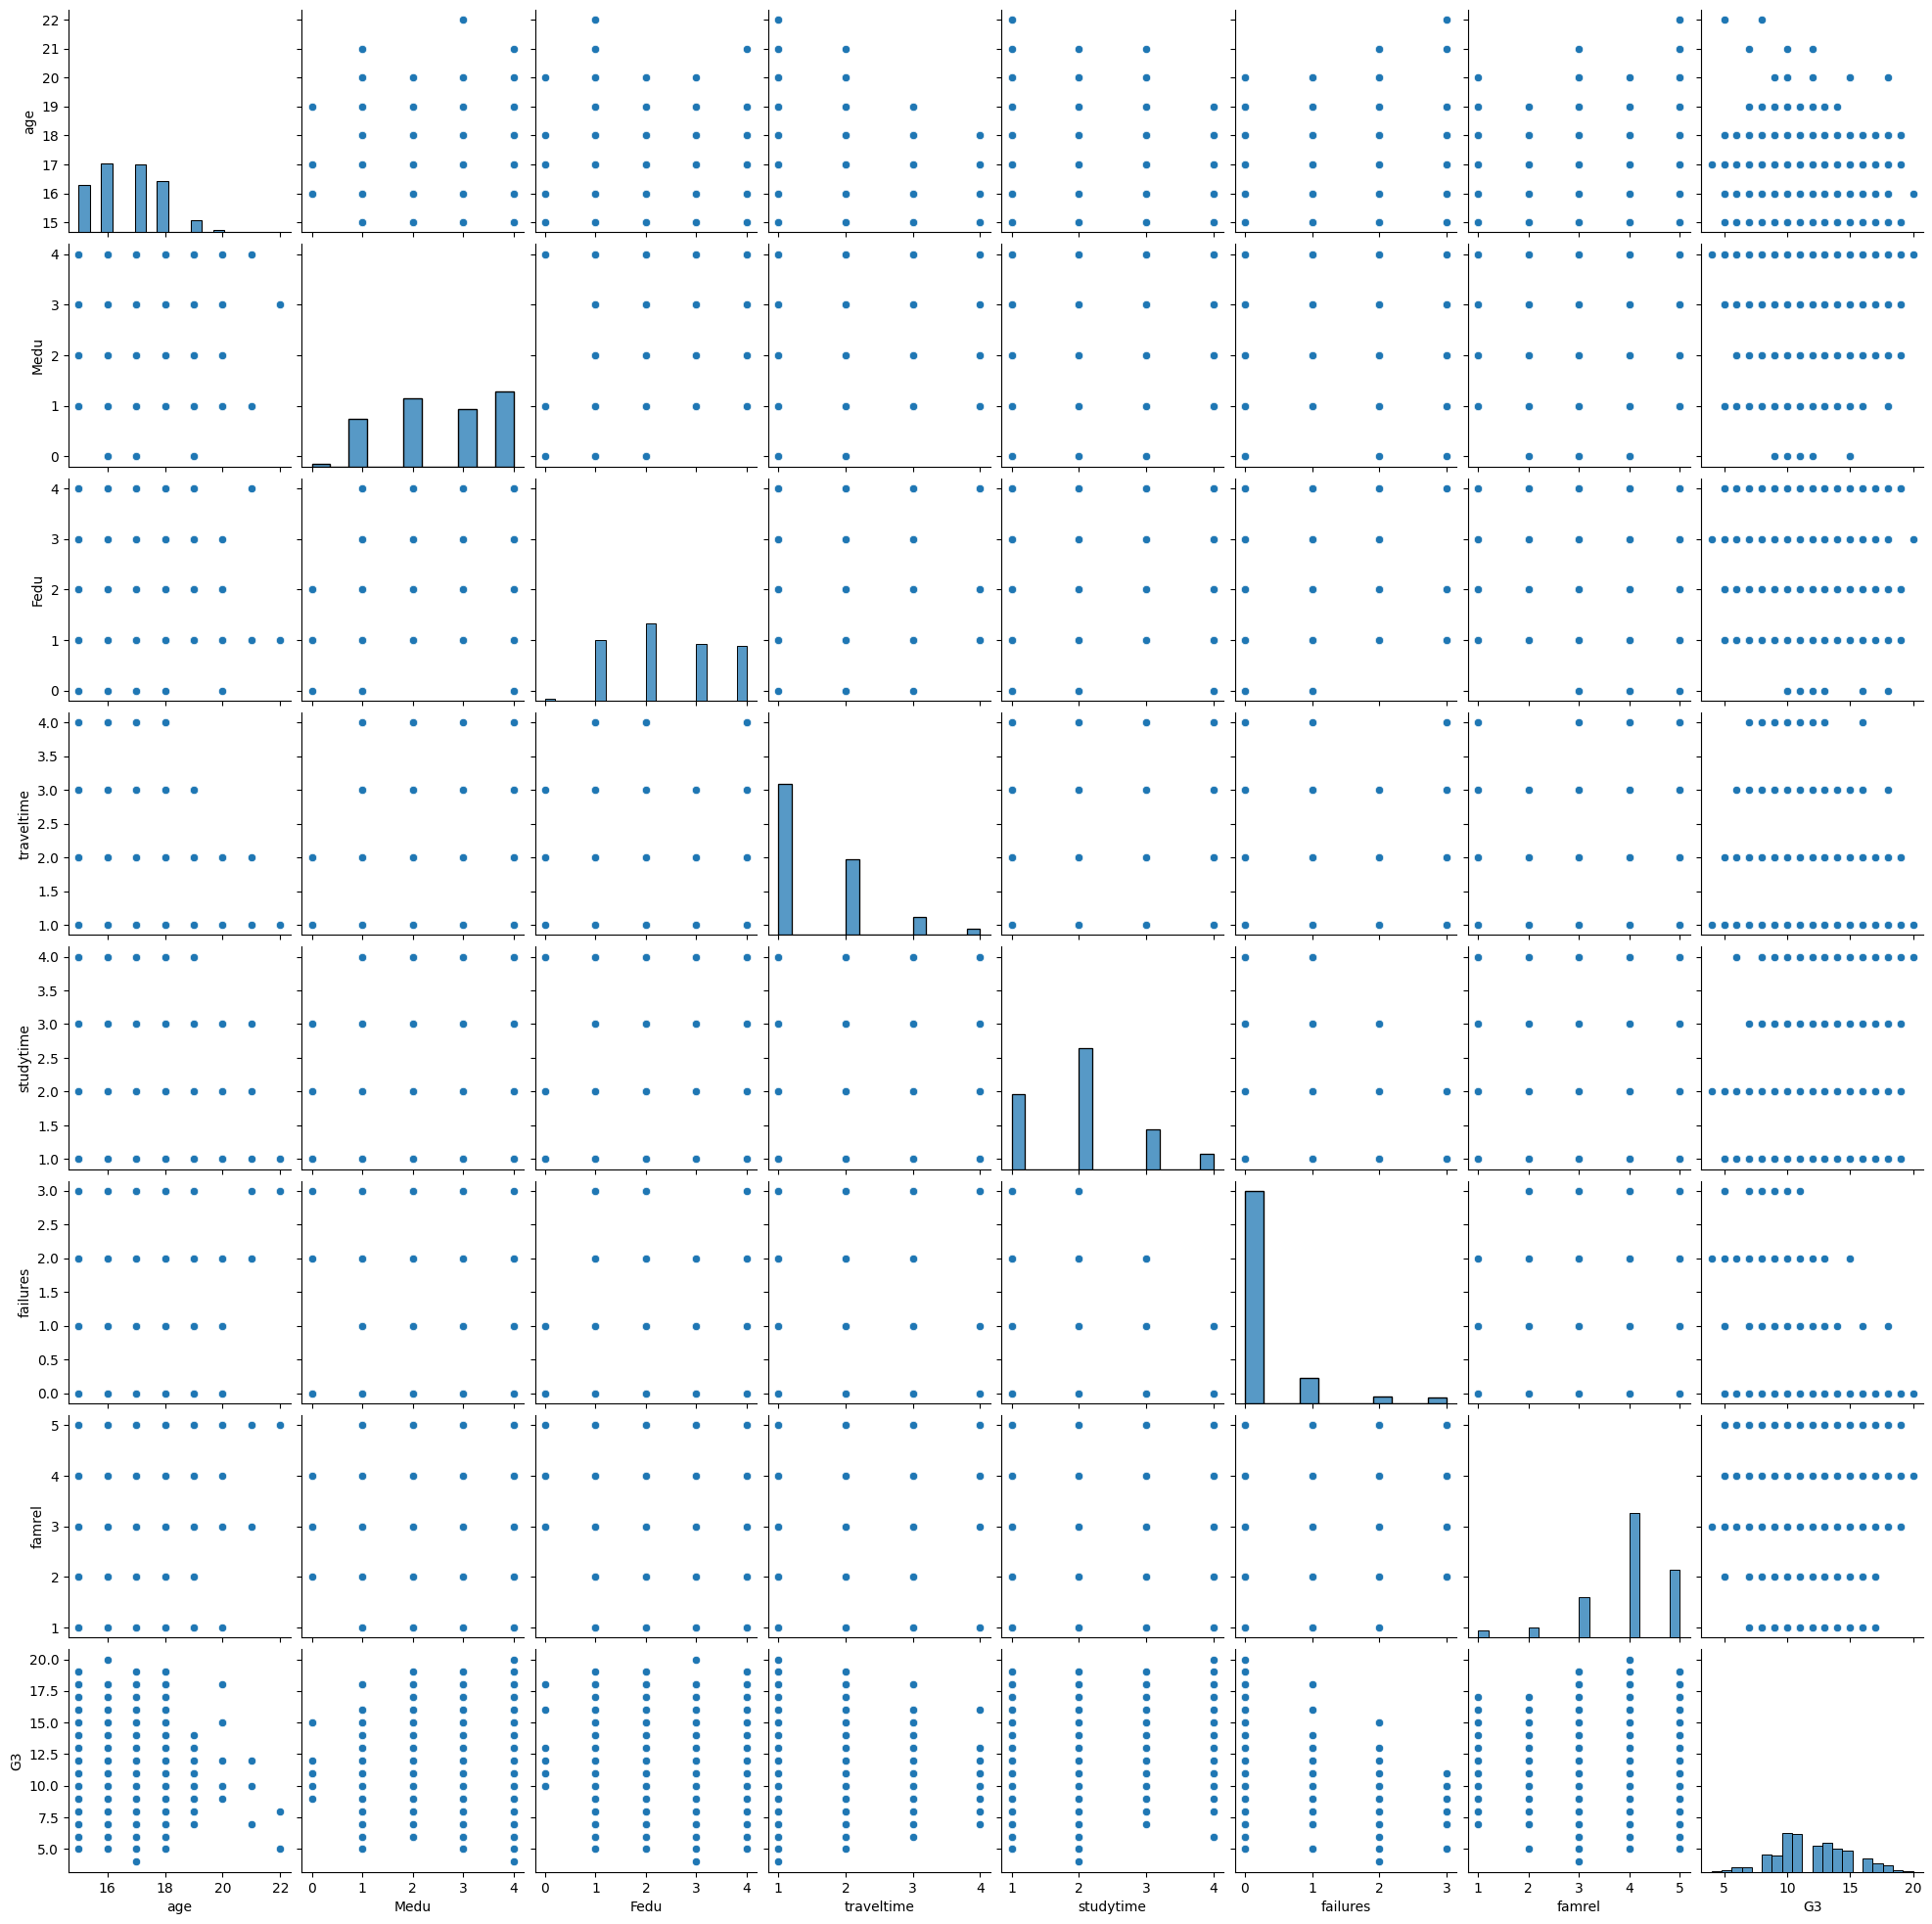

In [54]:
#pair plot for non object features
sns.pairplot(con_obj_7)

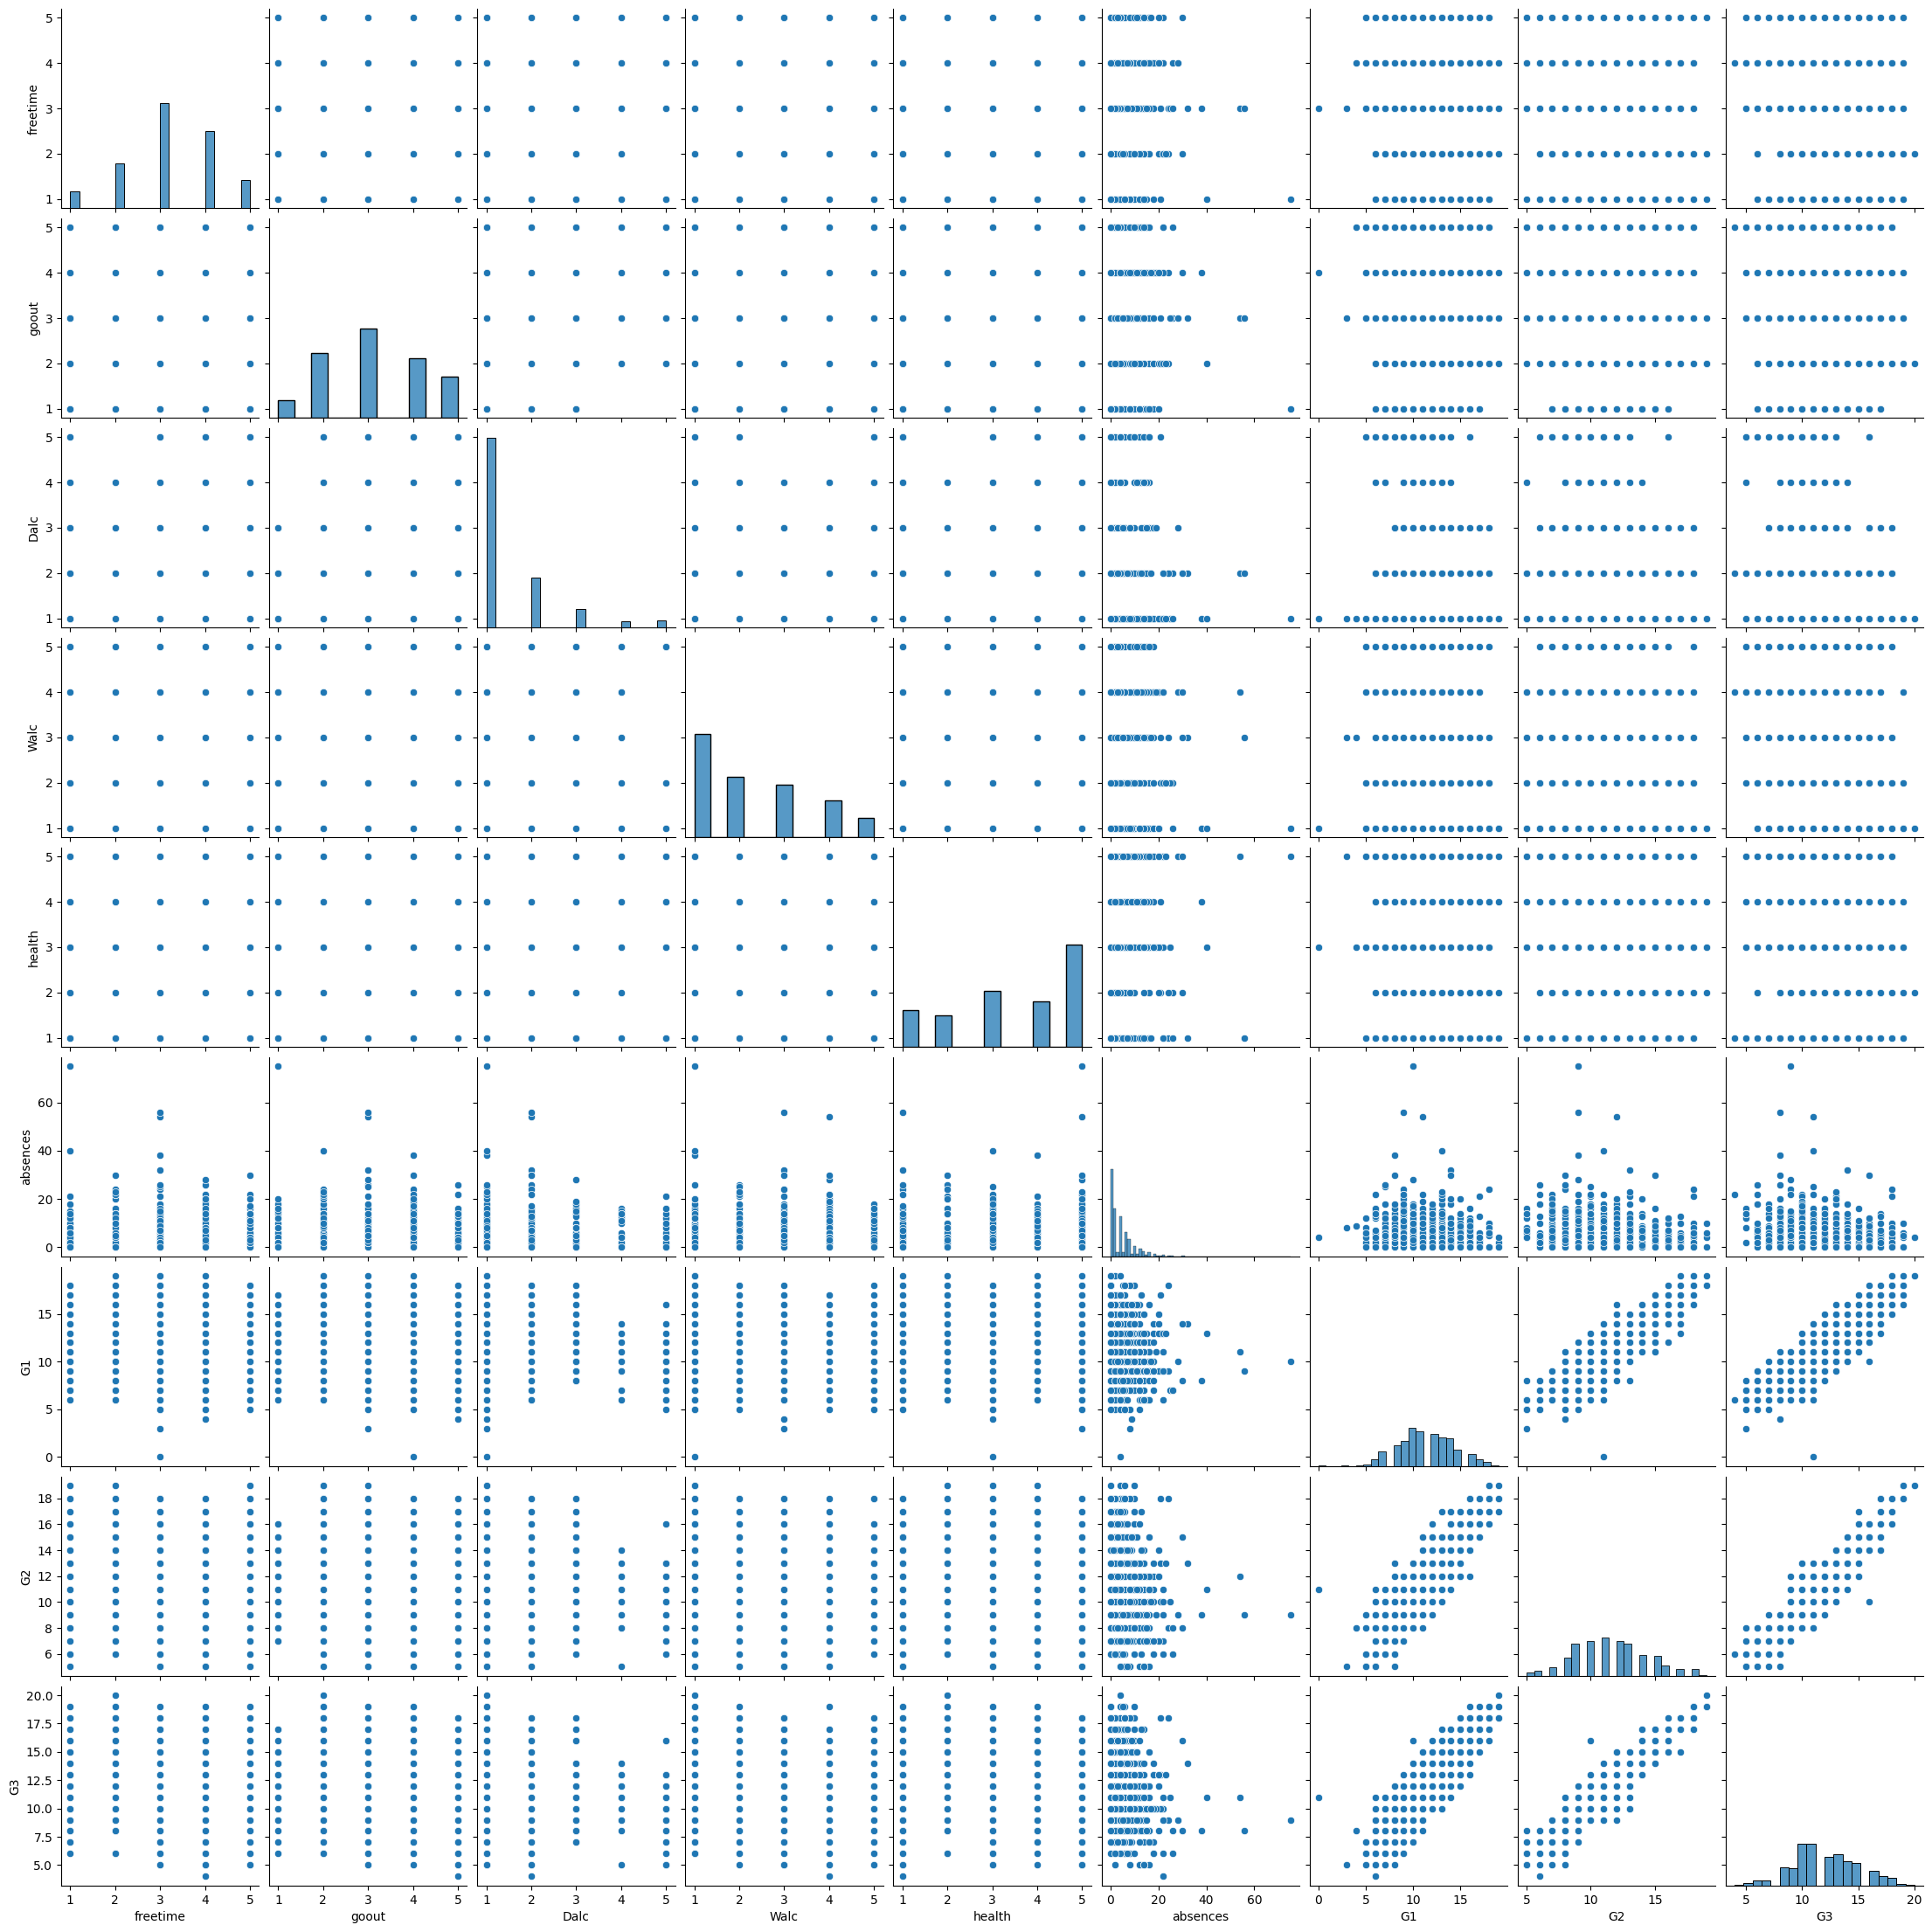

In [55]:
#pair plot for non object features
sns.pairplot(con_obj_7_14)

there is a few numeric features which are actualy object such as Walc or goout..,

### Goout

<Axes: xlabel='goout', ylabel='G3'>

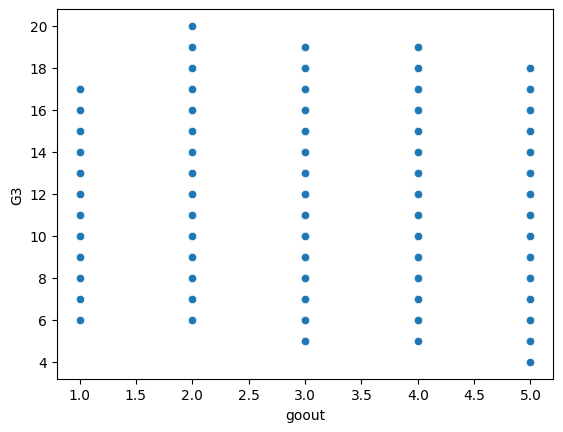

In [56]:
sns.scatterplot(data=df_new, x='goout', y='G3')

/tmp/ipykernel_8363/1665492823.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df_new[df['G3'] > 10]['goout'], discrete=True)


<Axes: xlabel='goout', ylabel='Count'>

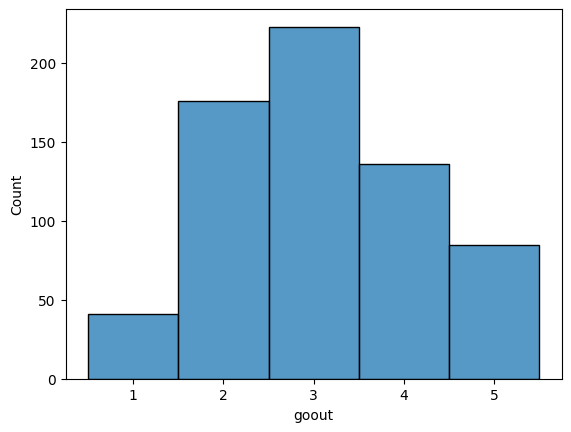

In [57]:
sns.histplot(df_new[df['G3'] > 10]['goout'], discrete=True)

<Axes: xlabel='G3', ylabel='Count'>

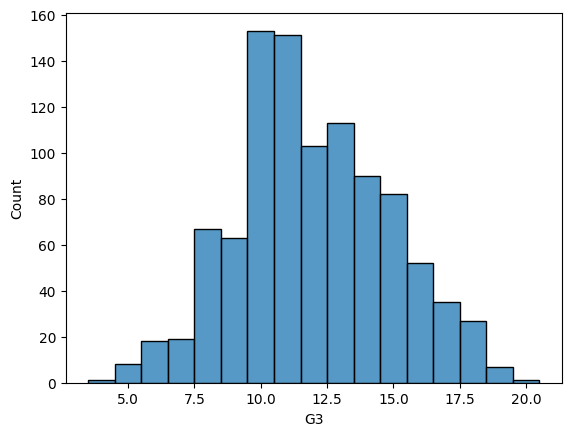

In [58]:
sns.histplot(df_new['G3'], discrete=True, bins=20)

### lets clasified G3 into bad, normal, good

In [60]:
df_new['grouped_g3'] = pd.cut(df_new['G3'], bins=[0,10,15,20], labels=[0, 1, 2])

In [61]:
df_new['grouped_g3'].value_counts()

1    539
0    329
2    122
Name: grouped_g3, dtype: int64

<Axes: xlabel='grouped_g3', ylabel='Count'>

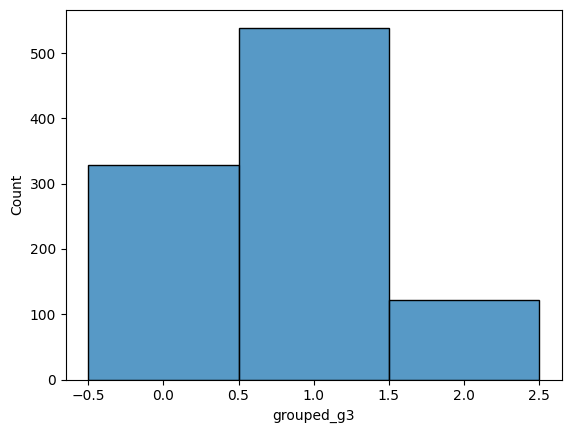

In [62]:
sns.histplot(df_new['grouped_g3'])

<Axes: xlabel='goout', ylabel='grouped_g3'>

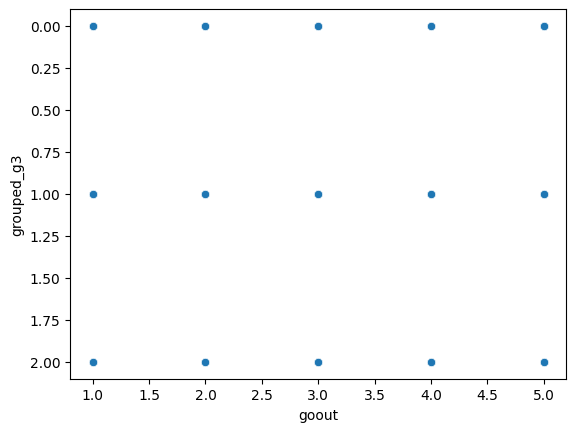

In [63]:
sns.scatterplot(data=df_new, x='goout', y='grouped_g3')

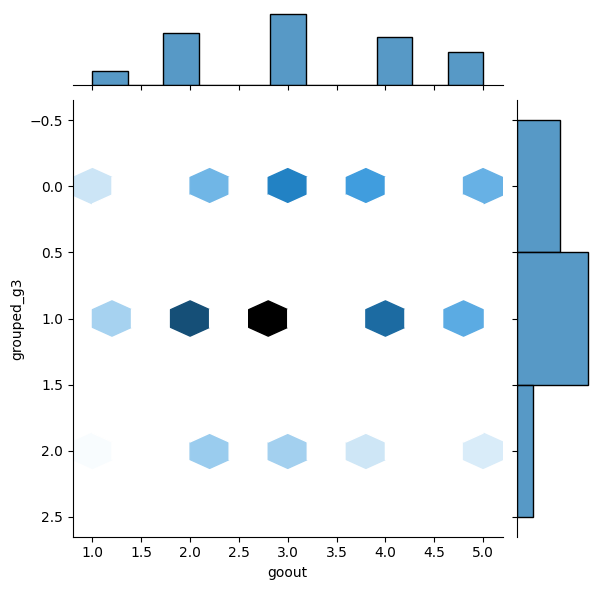

In [64]:
sns.jointplot(x=df_new['goout'], y=df_new['grouped_g3'], kind='hex')

we shoud change skewness of our skewed fearures

In [65]:
skewness_overall = df_new.skew(numeric_only=True).sort_values(ascending=False)
skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)]

absences      3.704740
failures      3.037928
Dalc          2.176671
traveltime    1.396295
studytime     0.660496
Walc          0.614028
famrel       -1.065977
dtype: float64

In [66]:
features = skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)].index
features

Index(['absences', 'failures', 'Dalc', 'traveltime', 'studytime', 'Walc',
       'famrel'],
      dtype='object')

In [83]:
np.sqrt(df_new['absences']).skew()

0.532986581851479

In [86]:
df_new1 = df_new.copy()

In [87]:
for i in features:
    df_new1[i] = np.sqrt(df_new[i])
    print(df_new1[i].skew())

0.532986581851479
2.202122875758647
1.7270947070610778
1.0419033019829311
0.23329793149417535
0.3207925284216796
-1.6559045693516854


**We can not use `log` or `boxcox` because data were negative and zero as well**

**as you saw there was not any strong relation between all parameter(except G1 and G2) and G3  
we use all features and G1,G2 for predicting G3**

In [88]:
df_new1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grouped_g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1.000000,1.000000,3,2.000000,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1.000000,1.000000,3,1.414214,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,1.414214,1.732051,3,2.449490,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1.000000,1.000000,5,0.000000,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1.000000,1.414214,5,0.000000,11,13,13,1


**we can use some feature engineering to create a useful features.  
coming soon... 😉**

In [89]:
df_new1.to_csv('pre-processed.csv', index=False)

### Done